# OpenPowerlifting Predictive Analytics

### by Mihail Santean

*This dataset is a snapshot of the [OpenPowerlifting](https://www.openpowerlifting.org/) database as of April 2019. OpenPowerlifting is creating a public-domain archive of powerlifting history. Powerlifting is a sport in which competitors compete to lift the most weight for their class in three separate barbell lifts: the Squat, Bench, and Deadlift.*

*(Source: [Kaggle](https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database))*

Our goal is to figure out which features we can use to predict an athlete's performance on the big 3 powerlifts: squat, bench, and deadlift.

## Importing and cleaning the data

First, let's import relevant libraries and examine our dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from numpy import mean
from numpy import absolute
from numpy import sqrt

In [2]:
df = pd.read_csv('openpowerlifting.csv')
df.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [3]:
df.shape

(386414, 17)

First we'd like to remove the irrelevant columns, such as MeetID, Name, Division, Place, and Wilks. We'd also like to get rid of redundant columns such as WeightClassKG, since we already have a bodyweight column that gives a more precise indicator of the athlete's weight:


In [4]:
df = df.drop(columns=['MeetID', 'Name', 'Division', 'WeightClassKg', 'Place', 'Wilks'])
df.head()

,Sex,Equipment,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg
0,F,Wraps,47.0,59.60,NaN,47.63,NaN,20.41,NaN,70.31,138.35
1,F,Single-ply,42.0,58.51,NaN,142.88,NaN,95.25,NaN,163.29,401.42
2,F,Single-ply,42.0,58.51,NaN,142.88,NaN,95.25,NaN,163.29,401.42
3,F,Raw,42.0,58.51,NaN,NaN,NaN,95.25,NaN,NaN,95.25
4,F,Raw,18.0,63.68,NaN,NaN,NaN,31.75,NaN,90.72,122.47


We remove a few more duplicate columns such as Squat4Kg, Bench4Kg, and Deadlift4Kg.

In [5]:
df = df.drop(columns=['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg'])
df.head()

,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg
0,F,Wraps,47.0,59.60,47.63,20.41,70.31,138.35
1,F,Single-ply,42.0,58.51,142.88,95.25,163.29,401.42
2,F,Single-ply,42.0,58.51,142.88,95.25,163.29,401.42
3,F,Raw,42.0,58.51,NaN,95.25,NaN,95.25
4,F,Raw,18.0,63.68,NaN,31.75,90.72,122.47


We now have the columns we desire.

However, we are not done cleaning our data. There are several missing values in our dataframe:

In [6]:
df.dtypes

Sex                object
Equipment          object
Age               float64
BodyweightKg      float64
BestSquatKg       float64
BestBenchKg       float64
BestDeadliftKg    float64
TotalKg           float64
dtype: object

In [7]:
df.isna().any()

Sex               False
Equipment         False
Age                True
BodyweightKg       True
BestSquatKg        True
BestBenchKg        True
BestDeadliftKg     True
TotalKg            True
dtype: bool

Our categorical data seems to be in place - however, we need to clean some of our numerical data. We will do this by simply dropping every row with missing values, as we want to examine competitors with available data for all three powerlifts.

In [8]:
df.isna().any()

Sex               False
Equipment         False
Age                True
BodyweightKg       True
BestSquatKg        True
BestBenchKg        True
BestDeadliftKg     True
TotalKg            True
dtype: bool

In [9]:
df = df.dropna()
df.isna().any()

Sex               False
Equipment         False
Age               False
BodyweightKg      False
BestSquatKg       False
BestBenchKg       False
BestDeadliftKg    False
TotalKg           False
dtype: bool

In [10]:
df.head()

,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg
0,F,Wraps,47.0,59.60,47.63,20.41,70.31,138.35
1,F,Single-ply,42.0,58.51,142.88,95.25,163.29,401.42
2,F,Single-ply,42.0,58.51,142.88,95.25,163.29,401.42
5,F,Wraps,28.0,62.41,170.10,77.11,145.15,392.36
6,F,Raw,60.0,67.31,124.74,95.25,163.29,383.28


In [11]:
df.shape

(106705, 8)

Next, we're primarily interested in the stats of raw (unequipped) powerlifters. This is because equipment such as wraps and suits allow someone to lift more than they normally would, and these datapoints would skew our data upward significantly. We would like to examine the raw unassisted strength of competitors:

In [12]:
df['Equipment'].unique()

array(['Wraps', 'Single-ply', 'Raw', 'Multi-ply'], dtype=object)

In [13]:
df = df[df['Equipment'] == 'Raw']
df = df.drop(columns='Equipment')
df.head()

,Sex,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg
6,F,60.0,67.31,124.74,95.25,163.29,383.28
7,F,60.0,67.31,124.74,95.25,163.29,383.28
14,F,17.0,69.31,81.65,49.90,115.67,247.22
17,F,18.0,77.93,86.18,52.16,83.91,222.25
18,F,22.0,88.72,102.06,77.11,120.20,299.37


Finally, we want to see if the values we're left with actually make sense:

In [14]:
for column in df:
    print(column, 'minimum value: ', df[column].min())
    print(column, 'maximum value: ', df[column].max())

Sex minimum value:  F
Sex maximum value:  M
Age minimum value:  7.0
Age maximum value:  93.0
BodyweightKg minimum value:  24.1
BodyweightKg maximum value:  220.2
BestSquatKg minimum value:  15.0
BestSquatKg maximum value:  477.5
BestBenchKg minimum value:  10.0
BestBenchKg maximum value:  320.0
BestDeadliftKg minimum value:  12.0
BestDeadliftKg maximum value:  420.5
TotalKg minimum value:  54.0
TotalKg maximum value:  1105.0


Some of these values don't make sense; for example, we have a 7 year old and a 93 year old competitor in our dataset.

A reasonable requirement would be to restrict our data to competitors between the ages of 18 and 60 inclusive:

In [15]:
df = df[df['Age'] >= 18]
df = df[df['Age'] <= 60]
df.shape

(62669, 7)

In [16]:
for column in df:
    print(column, 'minimum value: ', df[column].min())
    print(column, 'maximum value: ', df[column].max())

Sex minimum value:  F
Sex maximum value:  M
Age minimum value:  18.0
Age maximum value:  60.0
BodyweightKg minimum value:  30.1
BodyweightKg maximum value:  220.2
BestSquatKg minimum value:  15.9
BestSquatKg maximum value:  477.5
BestBenchKg minimum value:  17.5
BestBenchKg maximum value:  320.0
BestDeadliftKg minimum value:  12.0
BestDeadliftKg maximum value:  420.5
TotalKg minimum value:  72.6
TotalKg maximum value:  1105.0


We still have some dubious values left over. For example, there are competitors in our dataset weighing 30 kg, which is virtually impossible for an adult human to weigh.

Since the lightest IPF weight class is 47 kg, let's adjust our data set accordingly:

In [17]:
df = df[df['BodyweightKg'] >= 47]
df.shape

(62087, 7)

In [18]:
for column in df:
    print(column, 'minimum value: ', df[column].min())
    print(column, 'maximum value: ', df[column].max())

Sex minimum value:  F
Sex maximum value:  M
Age minimum value:  18.0
Age maximum value:  60.0
BodyweightKg minimum value:  47.0
BodyweightKg maximum value:  220.2
BestSquatKg minimum value:  15.9
BestSquatKg maximum value:  477.5
BestBenchKg minimum value:  20.0
BestBenchKg maximum value:  320.0
BestDeadliftKg minimum value:  12.0
BestDeadliftKg maximum value:  420.5
TotalKg minimum value:  75.0
TotalKg maximum value:  1105.0


Finally, we look at the lift values. We would expect a reasonably strong intermediate female lifter to at the very least bench press 60 kg, squat 100 kg, and deadlift 140 kg.

Let's remove some rows accordingly:

In [19]:
df = df[df['BestSquatKg'] >= 100]
df = df[df['BestBenchKg'] >= 60]
df = df[df['BestDeadliftKg'] >= 140]

df.shape

(48072, 7)

In [20]:
for column in df:
    print(column, 'minimum value: ', df[column].min())
    print(column, 'maximum value: ', df[column].max())
    
df.head()

Sex minimum value:  F
Sex maximum value:  M
Age minimum value:  18.0
Age maximum value:  60.0
BodyweightKg minimum value:  47.0
BodyweightKg maximum value:  211.4
BestSquatKg minimum value:  100.0
BestSquatKg maximum value:  477.5
BestBenchKg minimum value:  60.0
BestBenchKg maximum value:  320.0
BestDeadliftKg minimum value:  140.0
BestDeadliftKg maximum value:  420.5
TotalKg minimum value:  300.0
TotalKg maximum value:  1105.0


,Sex,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg
6,F,60.0,67.31,124.74,95.25,163.29,383.28
7,F,60.0,67.31,124.74,95.25,163.29,383.28
23,M,32.0,71.94,154.22,115.67,183.70,453.59
24,M,20.0,70.67,163.29,111.13,204.12,478.54
28,M,22.0,79.65,161.03,127.01,197.31,485.35


I am content with these values.

Finally, let's rename some columns and replace the categorical variable 'Sex' with numerical values:

In [21]:
df = df.replace('M', '1')
df = df.replace('F', '0')

df = df.rename(columns={'BodyweightKg': 'Bodyweight', 'BestSquatKg': 'Squat', 'BestBenchKg': 'Bench', 'BestDeadliftKg': 'Deadlift', 'TotalKg': 'Total'})

df = df.reset_index()
del df['index']
df.head()

,Sex,Age,Bodyweight,Squat,Bench,Deadlift,Total
0,0,60.0,67.31,124.74,95.25,163.29,383.28
1,0,60.0,67.31,124.74,95.25,163.29,383.28
2,1,32.0,71.94,154.22,115.67,183.70,453.59
3,1,20.0,70.67,163.29,111.13,204.12,478.54
4,1,22.0,79.65,161.03,127.01,197.31,485.35


Our goal is to predict how much a powerlifter is going to lift in competition.

Now that the data is cleaned, let's take a look and see if any relationships between the variables jump out at us:

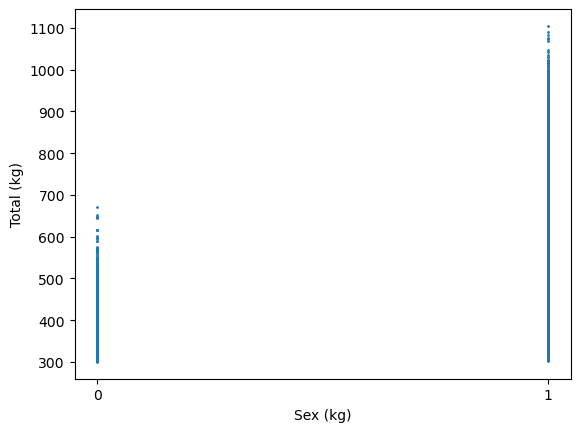

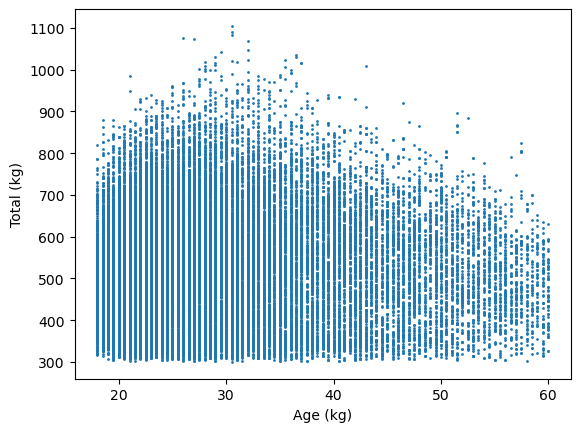

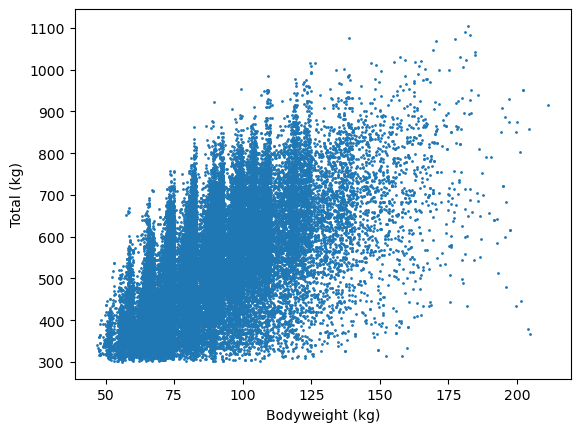

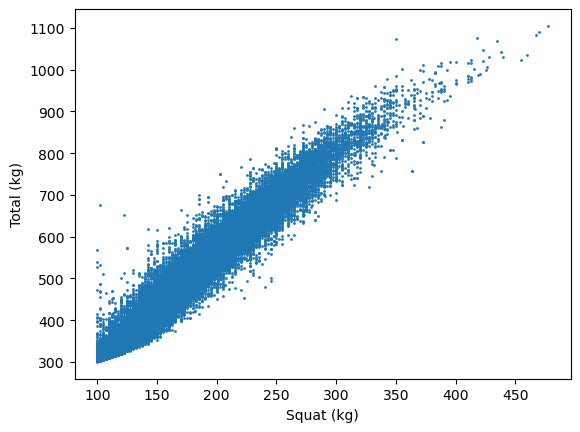

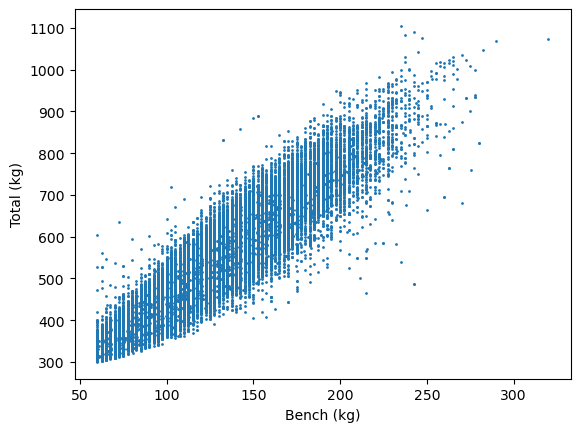

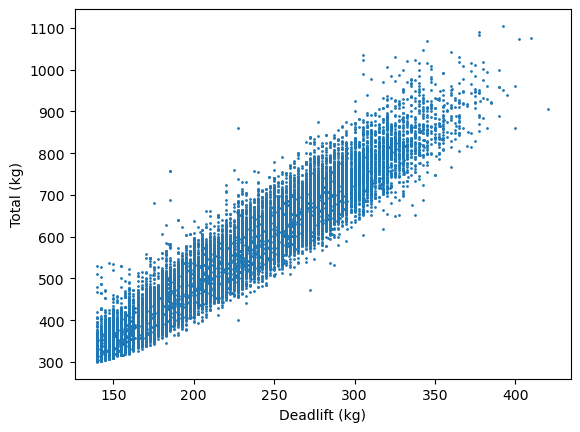

In [22]:
y = df[['Total']].values

for column in ['Sex', 'Age', 'Bodyweight', 'Squat', 'Bench', 'Deadlift']:
    x = df[column].values
    plt.scatter(x,y, s=1)
    plt.xlabel(column + ' (kg)')
    plt.ylabel('Total (kg)')
    plt.show()

In [23]:
df.corr(numeric_only= True)

,Age,Bodyweight,Squat,Bench,Deadlift,Total
Age,1.000000,0.156201,-0.052800,0.031879,-0.063734,-0.034508
Bodyweight,0.156201,1.000000,0.592562,0.589761,0.522964,0.595074
Squat,-0.052800,0.592562,1.000000,0.856002,0.887833,0.965199
Bench,0.031879,0.589761,0.856002,1.000000,0.834659,0.932505
Deadlift,-0.063734,0.522964,0.887833,0.834659,1.000000,0.957241
Total,-0.034508,0.595074,0.965199,0.932505,0.957241,1.000000


It appears that the male lifters are significantly stronger than the female ones.

It only makes sense that we see the strongest correlation between the individual lifts and the lifter's total, since the total is merely a sum of the three lifts.

We also see a moderate correlation between bodyweight and total weight lifted. After all, it would be reasonable to expect that a larger, more muscular human will lift heavier weights.

Since there appears to be zero correlation between total and age, we won't be standardizing our variables of interest as they are all in the same unit (kg).

Let's build a linear model that predicts a lifter's competition total using their bodyweight.

# Predicting a powerlifter's competition total

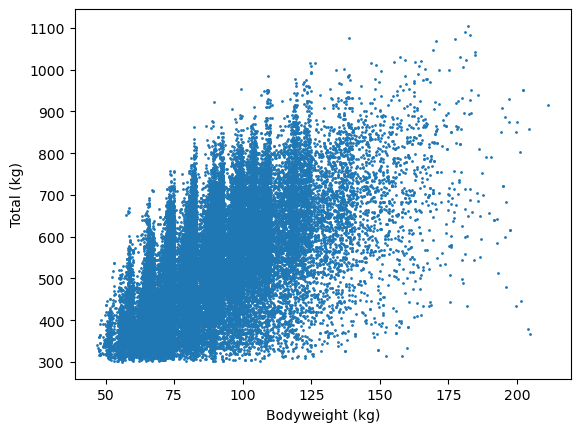

In [24]:
x = df[['Bodyweight']].values

plt.scatter(x,y, s=1)
plt.xlabel('Bodyweight (kg)')
plt.ylabel('Total (kg)')
plt.show()

If we train and test our model on only one segment of the data, our results may be inaccurate and not generalize well.

We will therefore use **10-fold cross validation** to validate the performance of our linear regression model.

We will score each model using **mean absolute error** in order to place less emphasis on the several outliers we see in our plot above.

In [25]:
def CrossValidate(features, target, scoring, k):

    cv = KFold(n_splits = k, shuffle=True)

    model = LinearRegression()

    scores = cross_val_score(model, features, target, scoring=scoring, cv=cv)

    print(scoring, ': ', scores)

CrossValidate(x, y, 'neg_mean_absolute_error', 10)

neg_mean_absolute_error :  [-78.23974192 -78.91393634 -80.01101523 -80.79235601 -79.04324254
 -81.50501633 -80.32202247 -79.88163882 -79.985388   -80.04790405]


We see that the metrics for all 10 folds are very close to each other. This is good, because it means our model is able to generalize and isn't over-fitting to any particular fold.

Let's fit the model now:

R-squared: 0.3632704313974263

Our model gives the following linear relationship between bodyweight (x) and total lifted (y):
 y =  3.59 x +  217.29


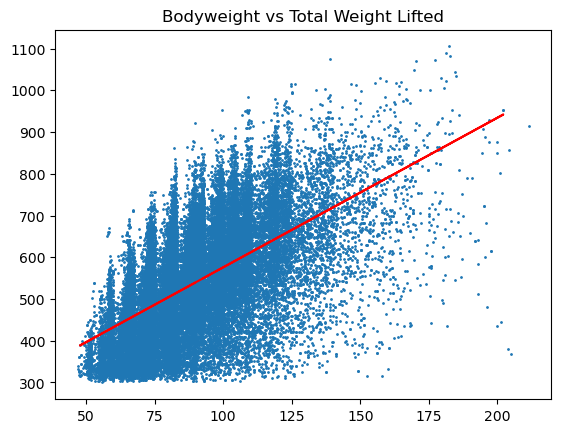

In [26]:
def LinearModel(x, y, title):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    print('R-squared:', metrics.r2_score(y_test, y_pred))
    
    slope = model.coef_[0][0].round(2)
    intercept = model.intercept_[0].round(2)
    
    print('\nOur model gives the following linear relationship between bodyweight (x) and total lifted (y):\n y = ', slope, 'x + ', intercept)
    
    plt.title(title)
    plt.scatter(x, y, s=1)
    plt.plot(x_test, y_pred, color='red')
    plt.show()
    
LinearModel(x, y, 'Bodyweight vs Total Weight Lifted')

We see that **bodyweight accounts for roughly 36.3% of the variance in the total weight lifted**.

This is a pretty decent R^2, considering we are only using a single feature to predict a number that can be explained by several other variables.

We can use our model to predict a lifter's competition total given their bodyweight. Here are several predictions:

In [45]:
weights = range(80, 201, 10)

for weight in weights:
    print("Predicted total weight lifted given a bodyweight of", weight, "kg: ", round(3.59*weight + 217.29, 2), ' kg')

Predicted total weight lifted given a bodyweight of 80 kg:  504.49  kg
Predicted total weight lifted given a bodyweight of 90 kg:  540.39  kg
Predicted total weight lifted given a bodyweight of 100 kg:  576.29  kg
Predicted total weight lifted given a bodyweight of 110 kg:  612.19  kg
Predicted total weight lifted given a bodyweight of 120 kg:  648.09  kg
Predicted total weight lifted given a bodyweight of 130 kg:  683.99  kg
Predicted total weight lifted given a bodyweight of 140 kg:  719.89  kg
Predicted total weight lifted given a bodyweight of 150 kg:  755.79  kg
Predicted total weight lifted given a bodyweight of 160 kg:  791.69  kg
Predicted total weight lifted given a bodyweight of 170 kg:  827.59  kg
Predicted total weight lifted given a bodyweight of 180 kg:  863.49  kg
Predicted total weight lifted given a bodyweight of 190 kg:  899.39  kg
Predicted total weight lifted given a bodyweight of 200 kg:  935.29  kg


Although an R^2 of ~0.363 is decent for a single variable, I'd like something a little bit better.

Let's see if segmenting our data by sex gives us greater predictive power.

# Segmenting our data by sex

Since we've seen significant differences in strength between the sexes in our dataset, it might be helpful to separate our dataset into male and female segments.

Let's see if we gain any predictive power when using bodyweight to predict the total of a lifter of each sex:

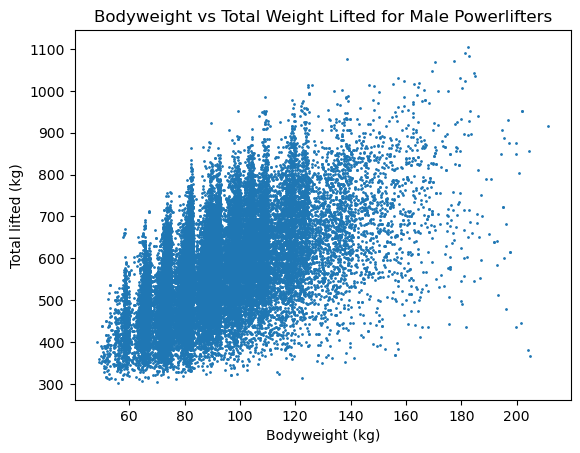

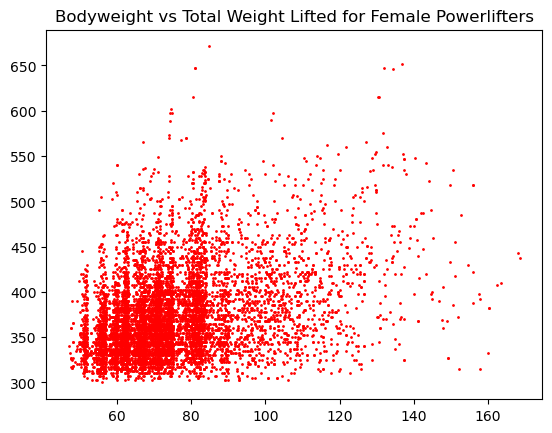

In [28]:
df_m = df[df['Sex']=='1'].drop(columns='Sex')
df_f = df[df['Sex']=='0'].drop(columns='Sex')

x_m = df_m[['Bodyweight']].values
y_m = df_m[['Total']].values

x_f = df_f[['Bodyweight']].values
y_f = df_f[['Total']].values

plt.scatter(x_m, y_m, s=1)
plt.title('Bodyweight vs Total Weight Lifted for Male Powerlifters')
plt.xlabel('Bodyweight (kg)')
plt.ylabel('Total lifted (kg)')
plt.show()

plt.scatter(x_f, y_f, s=1, color='red')
plt.title('Bodyweight vs Total Weight Lifted for Female Powerlifters')
plt.show()

In [29]:
df_m.shape

(39866, 6)

In [30]:
df_f.shape

(8206, 6)

In [31]:
df_m.corr()

,Age,Bodyweight,Squat,Bench,Deadlift,Total
Age,1.000000,0.206619,-0.005492,0.110430,-0.019236,0.022383
Bodyweight,0.206619,1.000000,0.557099,0.572077,0.471218,0.568237
Squat,-0.005492,0.557099,1.000000,0.805458,0.851168,0.958188
Bench,0.110430,0.572077,0.805458,1.000000,0.751238,0.897543
Deadlift,-0.019236,0.471218,0.851168,0.751238,1.000000,0.937572
Total,0.022383,0.568237,0.958188,0.897543,0.937572,1.000000


In [32]:
df_f.corr()

,Age,Bodyweight,Squat,Bench,Deadlift,Total
Age,1.000000,0.099351,-0.070552,0.090123,-0.010345,-0.010095
Bodyweight,0.099351,1.000000,0.372621,0.230594,0.262503,0.340920
Squat,-0.070552,0.372621,1.000000,0.641984,0.689119,0.915814
Bench,0.090123,0.230594,0.641984,1.000000,0.585629,0.815769
Deadlift,-0.010345,0.262503,0.689119,0.585629,1.000000,0.875767
Total,-0.010095,0.340920,0.915814,0.815769,0.875767,1.000000


Immediately we see a significantly stronger correlation between bodyweight and total in the male group than the female one.

Let's investigate further:

In [33]:
# 10-fold CV for male group:

CrossValidate(x_m, y_m, 'neg_mean_absolute_error', 10)

# 10-fold CV for female group:

CrossValidate(x_f, y_f, 'neg_mean_absolute_error', 10)

neg_mean_absolute_error :  [-70.23545072 -70.38671255 -70.9914594  -69.21950436 -70.89992287
 -68.83250467 -70.32288114 -70.34475525 -71.3108111  -69.32638413]
neg_mean_absolute_error :  [-32.11210225 -34.01386943 -34.65029415 -33.52696741 -34.57960615
 -32.58134252 -34.56375272 -32.96320119 -32.45492448 -33.09636032]


We see that the scores for each fold are relatively close to each other within each segment, which suggests that a linear model is appropriate for both segments of the data.

Note that the errors in the female group are roughly half the errors in the male group.

R-squared: 0.31048924905231456

Our model gives the following linear relationship between bodyweight (x) and total lifted (y):
 y =  3.09 x +  285.87


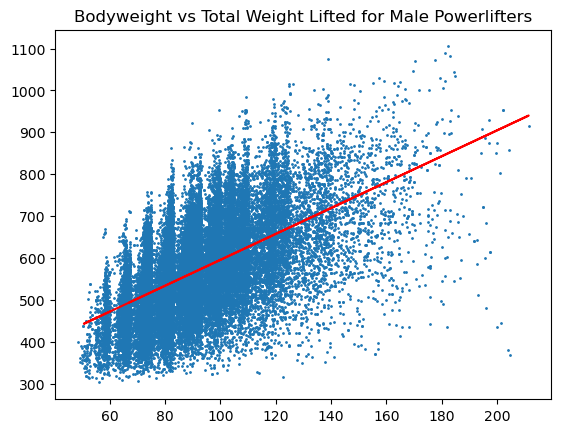

R-squared: 0.10053674844512062

Our model gives the following linear relationship between bodyweight (x) and total lifted (y):
 y =  0.93 x +  304.74


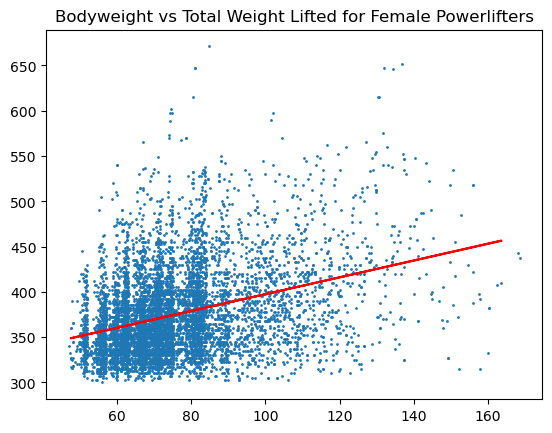

In [34]:
LinearModel(x_m, y_m, 'Bodyweight vs Total Weight Lifted for Male Powerlifters')

LinearModel(x_f, y_f, 'Bodyweight vs Total Weight Lifted for Female Powerlifters')

# Linear regression: writeup and conclusions

We see our R^2 was **significantly lower for the female group (\~0.1) than the male group (\~0.31).**

To conclude our findings, segmenting the data didn't give the bodyweight variable any better predictive power for the male group than the original model.

However, we did find that **bodyweight is a significantly better predictor for total weight lifted of male powerlifters than it is for female ones.**

One hypothesis that might explain this finding is that 1) women carry less muscle mass than men even with total bodyweight equated, and 2) women tend to have a higher proportion of endurance (type I) muscles fibres than maximal strength (type II) muscle fibres.

Furthermore, we see from the x-axes of the above plots that the bodyweights of female competitors are both smaller and less varied than their male counterparts.

We can see this by looking at the mean and variance of Bodyweight for each gender and their respective histograms:

Male bodyweight mean:  570.6571115737721 
Male bodyweight standard deviation:  108.11080084777963 

Female bodyweight mean:  374.5886838898367 
Female bodyweight standard deviation:  46.889977851178266


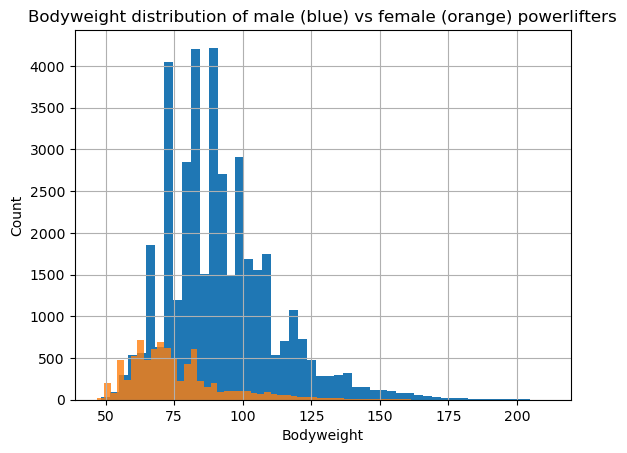

In [35]:
fig, ax = plt.subplots()
df_m.hist(column='Bodyweight', bins=50, ax=ax)
df_f.hist(column='Bodyweight', bins=50, ax=ax, alpha=0.8)
ax.set_xlabel('Bodyweight')
ax.set_ylabel('Count')
ax.set_title('Bodyweight distribution of male (blue) vs female (orange) powerlifters')
print('Male bodyweight mean: ', y_m.mean(), '\nMale bodyweight standard deviation: ', y_m.std(), '\n')
print('Female bodyweight mean: ', y_f.mean(), '\nFemale bodyweight standard deviation: ', y_f.std())

One should note that **there were significantly less female than male competitors in our sample** (8206 vs 39866, respectively).

Since there's less variance in the bodyweight of female competitors to begin with, it makes sense that their bodyweights explain less variability in total strength.

However, even for the male group, **less than half the variability in total weight lifted is predicted by bodyweight**. This suggests there are several other factors at play.

One way to interpret these results is that not all competitors in our dataset are professional powerlifters. Our data includes amateur leagues, drug tested vs. non-drug tested leagues, and even junior/college leagues.

Overall, **variables missing from our data** (such as experience level, height, performance-enhancing drug use, and other genetic factors such as bone density and muscle fibre composition) **will all have an impact on the lifter's competition performance.**

# Predicting a powerlifter's sex based on bench press strength

Take a look at the following output:

In [36]:
for lift in ['Squat', 'Bench', 'Deadlift']:
    print('Average male', lift, ' :', df_m[lift].mean())
    print('Average female', lift, ' :', df_f[lift].mean())
    print('Proportion of female to male strength:', df_f[lift].mean()/df_m[lift].mean(), '\n')

Average male Squat  : 200.85477048111176
Average female Squat  : 135.42387277601753
Proportion of female to male strength: 0.6742377711598974 

Average male Bench  : 136.89172226960318
Average female Bench  : 77.04694613697295
Proportion of female to male strength: 0.5628313009696221 

Average male Deadlift  : 232.91171800531782
Average female Deadlift  : 162.11842797952716
Proportion of female to male strength: 0.6960509731666901 



We see that the female:male strength ratio on the squat and deadlift are relatively close to each other, whereas the ratio for the bench press is significantly lower than both.

**I'd like to create a logistic regression model that predicts a lifter's sex based on how much they bench press.**

Text(0, 0.5, 'Sex (0 = female, 1 = male)')

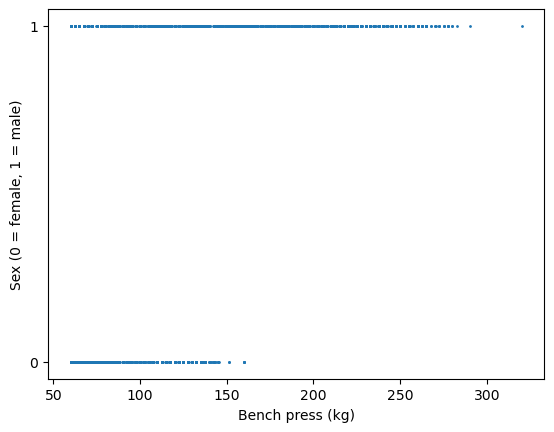

In [37]:
x = df['Bench'].values
y = df['Sex'].values

plt.scatter(x, y, s=1)
plt.xlabel('Bench press (kg)')
plt.ylabel('Sex (0 = female, 1 = male)')

We immediately see that **almost every single bench press above 150 kg was performed by a male athlete.**

Once again, we'll use 10-fold cross validation to see if a logistic regression model is appropriate for our data:

In [38]:
x = df[['Bench']].values
y = df[['Sex']].values

cv = KFold(n_splits = 10, shuffle=True)

model = LogisticRegression()

scores = cross_val_score(model, x, y.ravel(), scoring='accuracy', cv=cv)

scores

array([0.9359401 , 0.9390599 , 0.94320782, 0.94279176, 0.94258373,
       0.93488662, 0.94570418, 0.94320782, 0.94133555, 0.94216767])

Not only are the accuracies for each fold close to each other, they are also impressively high!

Let's implement our model and see what we get:

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y.ravel(), test_size = 0.2)
model.fit(x_train, y_train)

print('Accuracy of logistic regression classifier on test set: ', model.score(x_test, y_test))

Accuracy of logistic regression classifier on test set:  0.94269370774831


In [40]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Correct predictions: ', confusion_matrix[0][0] + confusion_matrix[1][1])
print('Inorrect predictions: ', confusion_matrix[1][0] + confusion_matrix[0][1])

[[1308  335]
 [ 216 7756]]
Correct predictions:  9064
Inorrect predictions:  551


Our confusion matrix tells us our model made **9064 correct predictions** and only **551 incorrect predictions** on the test set.

This is an extremely good model!

Let's plot the loss function:

In [41]:
def loss(x):
    return 1/(1 + math.e**(-(intercept + slope * x)))

x_loss = []
y_loss = []
slope = model.coef_[0][0].round(2)
intercept = model.intercept_[0].round(2)

for i in range(int(df['Bench'].min()), int(df['Bench'].max())):
    x_loss.append(i)
    
for i in range(len(x_loss)):
    y_loss.append(loss(x_loss[i]))

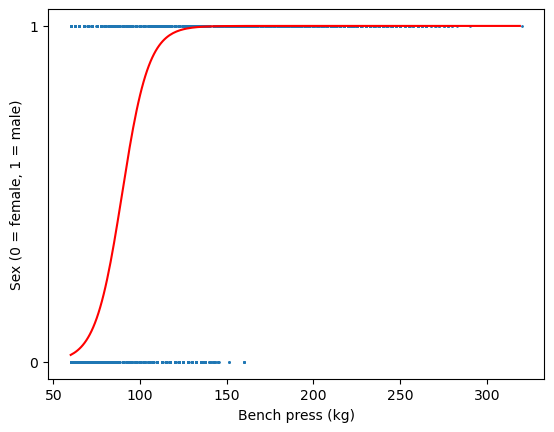

In [42]:
x = df['Bench'].values
y = df['Sex'].values

plt.scatter(x, y, s=1)
plt.plot(x_loss, y_loss, color='red')
plt.xlabel('Bench press (kg)')
plt.ylabel('Sex (0 = female, 1 = male)')
plt.show()

Finally, let's apply our model and see what probability a competitor is male given a few bench press numbers:

In [43]:
for weight in [60, 80, 100, 120, 140, 160, 180]:
    print('Probability a', weight, 'kg competition bench presser is male:', loss(weight).round(4))

Probability a 60 kg competition bench presser is male: 0.0208
Probability a 80 kg competition bench presser is male: 0.2227
Probability a 100 kg competition bench presser is male: 0.7941
Probability a 120 kg competition bench presser is male: 0.9811
Probability a 140 kg competition bench presser is male: 0.9986
Probability a 160 kg competition bench presser is male: 0.9999
Probability a 180 kg competition bench presser is male: 1.0


# Logistic regression: writeup and conclusions

We fit a logistic regression model that **predicts a powerlifter's gender given their bench press with a ~94.3% accuracy**.

What's more, our model tells us that given a competition bench press over 160 kilograms, we can be almost certain that the athlete was male.

The reason this model is so effective can be explained by biological differences in upper body strength between the genders.

Men have proportionately much stronger upper bodies than women, which explains why this particular feature was so effective at predicting a competitor's gender.

**Had we used the squat or deadlift as a predictor instead, our accuracy would have been lower** (albeit still very good, as seen below):

In [44]:
for lift in ['Squat', 'Deadlift']:
    x = df[lift].values.reshape(-1,1)
    
    cv = KFold(n_splits = 10, shuffle=True)

    model = LogisticRegression()

    scores = cross_val_score(model, x, y.ravel(), scoring='accuracy', cv=cv)

    print(lift, 'scores:', scores)

Squat scores: [0.88893511 0.88602329 0.8826711  0.87518203 0.88454337 0.88849594
 0.88807988 0.88183898 0.88308716 0.88391928]
Deadlift scores: [0.90910982 0.90328619 0.90617849 0.9076347  0.90784273 0.91720408
 0.90825879 0.90950697 0.90805076 0.90825879]
